In [ ]:
import jieba
import jieba.analyse
import re
import pandas as pd
import matplotlib.pyplot as plt

權重前100
   word#    TF-IDF
0     什麼  0.194645
1     八卦  0.194205
2     台灣  0.120814
3     怎麼  0.111867
4     肥宅  0.073366
..   ...       ...
95    不過  0.007350
96    一直  0.007303
97    ..  0.007249
98   ptt  0.007110
99    最強  0.006979

[100 rows x 2 columns]
fig1:


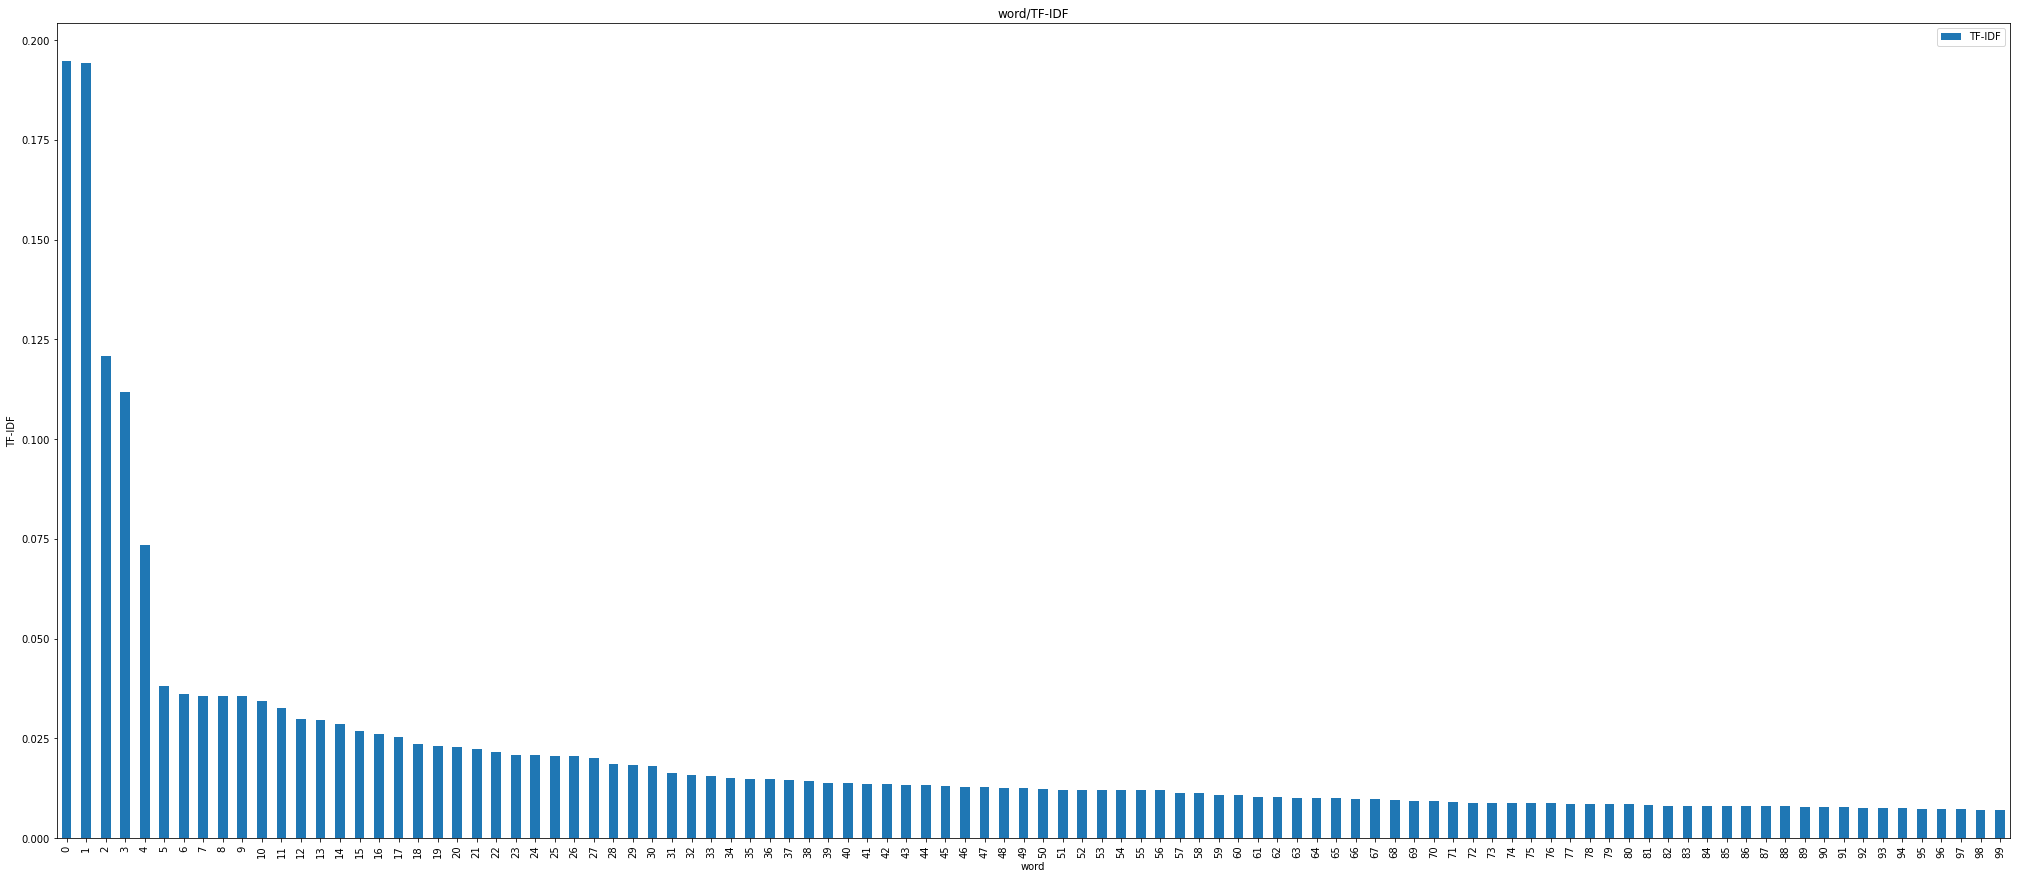

In [ ]:
def TF_IDF():
    txt = open("original.txt", encoding="utf-8").read()
    topwords = jieba.analyse.extract_tags(txt, 100, withWeight=True)

    data = pd.DataFrame(topwords, columns = ["word#", "TF-IDF"]) 
    print('權重前100')
    print(data)
    print('fig1:')
    chart = data.plot( kind ='bar',
                    title = 'word/TF-IDF',
                    xlabel = 'word',
                    ylabel = 'TF-IDF',
                    figsize = (35,15))
    plt.show()

def Frequency():
    seg_word=""
    txt = open("original.txt", encoding="utf-8").read()
    ch =re.compile("[\u4e00-\u9fa5]")
    seg_word =  "".join(ch.findall(txt))
    cut = jieba.lcut(seg_word)

    counts = {}
    for i in cut :
        if(len(i)>1):
            counts[i] = counts.get(i,0) + 1

    items = list(counts.items())  
    items.sort(key=lambda x:x[1], reverse=True)

    for i in range(100):  
        word, count = items[i]  
        # print("{0:<10}{1:>5}".format(word, count))
    
    data = pd.DataFrame(items, columns = ["word#", "Frequncy"]).sort_values(['Frequncy'],ascending=[False])[0:100]
    print('出現頻率前100')
    print(data)
    print('fig2:')
    chart = data.plot( kind ='bar',
                    title = 'word/Frequncy',
                    xlabel = 'word',
                    ylabel = 'Frequncy',
                    figsize = (35,15))
    plt.show()
    
TF_IDF()
Frequency()